# Molecular filtering: ADME and lead-likeness criteria

## Import library 

In [1]:
from pathlib import Path
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

## Import DrugBank Approved Drugs Database

In [ ]:
# Import Databases/DrugBank/Approved_Drugs_DB.csv
df = pd.read_csv('Approved_Drugs_DB.csv', sep=';')

# Create a new DataFrame with only the 'ID' and 'SMILES' columns
drugbank_molecules = df[['ID', 'SMILES']]
drugbank_molecules

,ID,SMILES
0,DB00006,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...
1,DB00014,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...
2,DB00027,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...
3,DB00035,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...
4,DB00050,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...
...,...,...
2642,DB19375,CC(C)C1=CC(Cl)=C(C)C=C1O
2643,DB19376,OC1=CC=CC=C1C(=O)NC1=CC=CC=C1
2644,DB19378,[H][C@@]12CC[C@](O)(C(C)=O)[C@@]1(C)CC[C@@]1([...
2645,DB19379,[H][C@]12C[C@@H](OC(=O)C3=CC(OC)=C(OC(=O)OCC)C...


## Transform SMILES into Molecule Object

[17:36:13] WARNING: not removing hydrogen atom without neighbors
[17:36:13] WARNING: not removing hydrogen atom without neighbors
c:\Users\ary-r\anaconda3.9\envs\python3\Lib\site-packages\rdkit\Chem\PandasTools.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,ID,SMILES,ROMol
0,DB00006,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,
1,DB00014,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,
2,DB00027,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,
3,DB00035,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,
4,DB00050,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,
...,...,...,...
2642,DB19375,CC(C)C1=CC(Cl)=C(C)C=C1O,
2643,DB19376,OC1=CC=CC=C1C(=O)NC1=CC=CC=C1,
2644,DB19378,[H][C@@]12CC[C@](O)(C(C)=O)[C@@]1(C)CC[C@@]1([...,
2645,DB19379,[H][C@]12C[C@@H](OC(=O)C3=CC(OC)=C(OC(=O)OCC)C...,

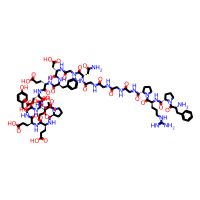
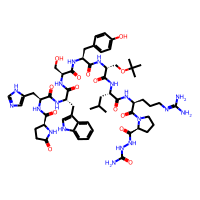
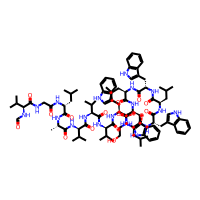
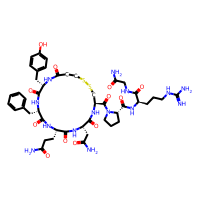
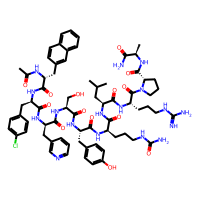
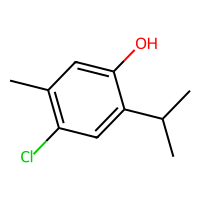
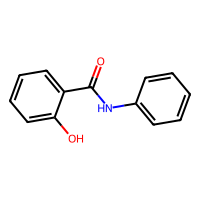
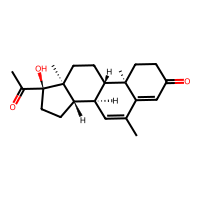
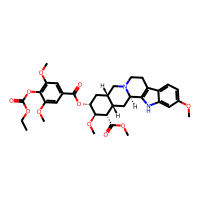
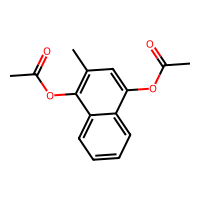

In [3]:
PandasTools.AddMoleculeColumnToFrame(drugbank_molecules, "SMILES")
drugbank_molecules

## Calculate and plot molecular properties for Ro5

In [4]:

drugbank_molecules["molecular_weight"] = drugbank_molecules["ROMol"].apply(Descriptors.ExactMolWt)
drugbank_molecules["n_hba"] = drugbank_molecules["ROMol"].apply(Descriptors.NumHAcceptors)
drugbank_molecules["n_hbd"] = drugbank_molecules["ROMol"].apply(Descriptors.NumHDonors)
drugbank_molecules["logp"] = drugbank_molecules["ROMol"].apply(Descriptors.MolLogP)

# molecules
drugbank_molecules[["molecular_weight", "n_hba", "n_hbd", "logp"]]

,molecular_weight,n_hba,n_hbd,logp
0,2178.985813,29,28,-8.11643
1,1268.641439,16,17,-3.10570
2,1810.033419,16,20,4.86760
3,1068.426955,15,14,-4.13203
4,1429.669818,16,17,-0.50613
...,...,...,...,...
2642,184.065493,1,1,3.47742
2643,213.078979,2,2,2.64450
2644,342.219495,3,1,4.00450
2645,666.278860,12,1,4.69780


,ID,SMILES,ROMol,molecular_weight,n_hba,n_hbd,logp
0,DB00006,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,,2178.985813,29,28,-8.11643
1,DB00014,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,,1268.641439,16,17,-3.10570
2,DB00027,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,,1810.033419,16,20,4.86760
3,DB00035,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,,1068.426955,15,14,-4.13203
4,DB00050,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,,1429.669818,16,17,-0.50613
...,...,...,...,...,...,...,...
2642,DB19375,CC(C)C1=CC(Cl)=C(C)C=C1O,,184.065493,1,1,3.47742
2643,DB19376,OC1=CC=CC=C1C(=O)NC1=CC=CC=C1,,213.078979,2,2,2.64450
2644,DB19378,[H][C@@]12CC[C@](O)(C(C)=O)[C@@]1(C)CC[C@@]1([...,,342.219495,3,1,4.00450
2645,DB19379,[H][C@]12C[C@@H](OC(=O)C3=CC(OC)=C(OC(=O)OCC)C...,,666.278860,12,1,4.69780

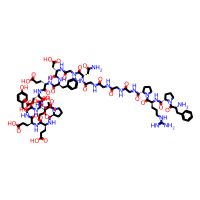
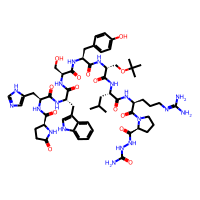
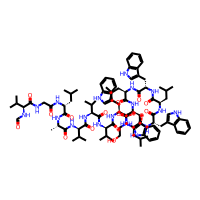
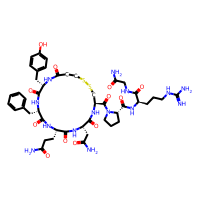
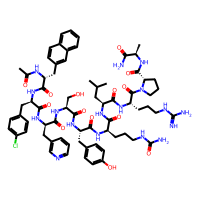
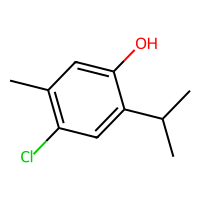
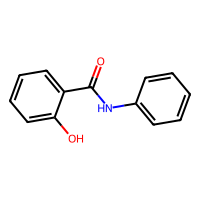
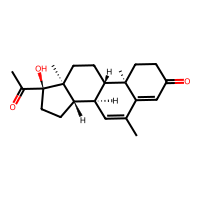
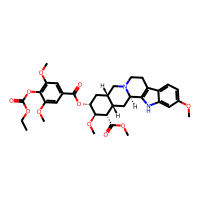
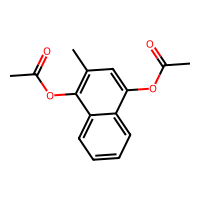

In [5]:
drugbank_molecules 

## Calculate RO5 properties

In [ ]:
def calculate_ro5_properties(smiles):
    """
    Test if input molecule (SMILES) fulfills Lipinski's rule of five.

    Parameters
    ----------
    smiles : str
        SMILES for a molecule.

    Returns
    -------
    pandas.Series
        Molecular weight, number of hydrogen bond acceptors/donor and logP value
        and Lipinski's rule of five compliance for input molecule.
    """
    # RDKit molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    # Calculate Ro5-relevant chemical properties
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    # Check if Ro5 conditions fulfilled
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    # Return True if no more than one out of four conditions is violated
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled],
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "ro5_fulfilled"],
    )

## Apply the Ro5 to all molecules

In [7]:
# This takes a couple of seconds
ro5_properties = drugbank_molecules["SMILES"].apply(calculate_ro5_properties)
ro5_properties.head()

[17:36:39] WARNING: not removing hydrogen atom without neighbors
[17:36:39] WARNING: not removing hydrogen atom without neighbors


,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,2178.985813,29,28,-8.11643,False
1,1268.641439,16,17,-3.10570,False
2,1810.033419,16,20,4.86760,False
3,1068.426955,15,14,-4.13203,False
4,1429.669818,16,17,-0.50613,False


## Concatenate molecules with Ro5 data

In [8]:
molecules = pd.concat([drugbank_molecules[['ID', 'SMILES']], ro5_properties], axis=1)
molecules.head()

,ID,SMILES,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,DB00006,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,2178.985813,29,28,-8.11643,False
1,DB00014,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,1268.641439,16,17,-3.10570,False
2,DB00027,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,1810.033419,16,20,4.86760,False
3,DB00035,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,1068.426955,15,14,-4.13203,False
4,DB00050,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,1429.669818,16,17,-0.50613,False


In [12]:
# Save the dataframe
molecules.to_csv("DB_compounds_lipinski.csv")

In [13]:
# Note that the column "ro5_fulfilled" contains boolean values.
# Thus, we can use the column values directly to subset data.
# Note that ~ negates boolean values.
molecules_ro5_fulfilled = molecules[molecules["ro5_fulfilled"]]
molecules_ro5_violated = molecules[~molecules["ro5_fulfilled"]]

print(f"# compounds in unfiltered data set: {molecules.shape[0]}")
print(f"# compounds in filtered data set: {molecules_ro5_fulfilled.shape[0]}")
print(f"# compounds not compliant with the Ro5: {molecules_ro5_violated.shape[0]}")

# compounds in unfiltered data set: 2647
# compounds in filtered data set: 2281
# compounds not compliant with the Ro5: 366


In [14]:
molecules_ro5_fulfilled

,ID,SMILES,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
8,DB00114,CC1=NC=C(COP(O)(O)=O)C(C=O)=C1O,247.024574,5,3,0.51742,True
10,DB00118,C[S+](CC[C@H](N)C([O-])=O)C[C@H]1O[C@H]([C@H](...,398.137239,11,4,-3.25690,True
11,DB00119,CC(=O)C(O)=O,88.016044,2,1,-0.34000,True
12,DB00120,N[C@@H](CC1=CC=CC=C1)C(O)=O,165.078979,2,2,0.64100,True
13,DB00121,[H][C@]12CS[C@@H](CCCCC(O)=O)[C@@]1([H])NC(=O)N2,244.088163,3,3,0.79680,True
...,...,...,...,...,...,...,...
2641,DB19365,CCN1C(=O)C=C(N)N(CC=C)C1=O,195.100777,5,1,-0.20190,True
2642,DB19375,CC(C)C1=CC(Cl)=C(C)C=C1O,184.065493,1,1,3.47742,True
2643,DB19376,OC1=CC=CC=C1C(=O)NC1=CC=CC=C1,213.078979,2,2,2.64450,True
2644,DB19378,[H][C@@]12CC[C@](O)(C(C)=O)[C@@]1(C)CC[C@@]1([...,342.219495,3,1,4.00450,True


In [15]:
# Save filtered data
molecules_ro5_fulfilled.to_csv("DB_ro5_fulfilled.csv")
molecules_ro5_fulfilled.head()

,ID,SMILES,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
8,DB00114,CC1=NC=C(COP(O)(O)=O)C(C=O)=C1O,247.024574,5,3,0.51742,True
10,DB00118,C[S+](CC[C@H](N)C([O-])=O)C[C@H]1O[C@H]([C@H](...,398.137239,11,4,-3.25690,True
11,DB00119,CC(=O)C(O)=O,88.016044,2,1,-0.34000,True
12,DB00120,N[C@@H](CC1=CC=CC=C1)C(O)=O,165.078979,2,2,0.64100,True
13,DB00121,[H][C@]12CS[C@@H](CCCCC(O)=O)[C@@]1([H])NC(=O)N2,244.088163,3,3,0.79680,True


## Visualize Ro5 properties (radar plot)

In [36]:
# Define a helper function to calculate the mean and standard deviation for an input DataFrame.

def calculate_mean_std(dataframe):
    """
    Calculate the mean and standard deviation of a dataset.

    Parameters
    ----------
    dataframe : pd.DataFrame
        Properties (columns) for a set of items (rows).

    Returns
    -------
    pd.DataFrame
        Mean and standard deviation (columns) for different properties (rows).
    """
    # Generate descriptive statistics for property columns
    stats = dataframe.describe()
    # Transpose DataFrame (statistical measures = columns)
    stats = stats.T
    # Select mean and standard deviation
    stats = stats[["mean", "std"]]
    return stats

### We calculate the statistic for the dataset of compounds that are fulfilling the Ro5

In [47]:
molecules_ro5_fulfilled_stats = calculate_mean_std(
    molecules_ro5_fulfilled[["molecular_weight", "n_hba", "n_hbd", "logp"]]
)
molecules_ro5_fulfilled_stats
# NBVAL_CHECK_OUTPUT

,mean,std
molecular_weight,312.775029,130.792085
n_hba,4.182815,2.411664
n_hbd,1.594038,1.440955
logp,1.834582,2.919366


### We calculate the statistic for the dataset of compounds that are violating the Ro5

In [48]:
molecules_ro5_violated_stats = calculate_mean_std(
    molecules_ro5_violated[["molecular_weight", "n_hba", "n_hbd", "logp"]]
)
molecules_ro5_violated_stats

,mean,std
molecular_weight,868.881832,534.869279
n_hba,13.732240,10.130080
n_hbd,6.983607,8.058332
logp,1.226609,7.669963


In [49]:
def _scale_by_thresholds(stats, thresholds, scaled_threshold):
    """
    Scale values for different properties that have each an individually defined threshold.

    Parameters
    ----------
    stats : pd.DataFrame
        Dataframe with "mean" and "std" (columns) for each physicochemical property (rows).
    thresholds : dict of str: int
        Thresholds defined for each property.
    scaled_threshold : int or float
        Scaled thresholds across all properties.

    Returns
    -------
    pd.DataFrame
        DataFrame with scaled means and standard deviations for each physiochemical property.
    """
    # Raise error if scaling keys and data_stats indicies are not matching
    for property_name in stats.index:
        if property_name not in thresholds.keys():
            raise KeyError(f"Add property '{property_name}' to scaling variable.")
    # Scale property data
    stats_scaled = stats.apply(lambda x: x / thresholds[x.name] * scaled_threshold, axis=1)
    return stats_scaled

In [50]:
def _define_radial_axes_angles(n_axes):
    """Define angles (radians) for radial (x-)axes depending on the number of axes."""
    x_angles = [i / float(n_axes) * 2 * math.pi for i in range(n_axes)]
    x_angles += x_angles[:1]
    return x_angles

## Radar plot Ro5 fulfilled

In [78]:
def plot_radar(
    y,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max=None,
    output_path=None,
):
    """
    Plot a radar chart based on the mean and standard deviation of a data set's properties.

    Parameters
    ----------
    y : pd.DataFrame
        Dataframe with "mean" and "std" (columns) for each physicochemical property (rows).
    thresholds : dict of str: int
        Thresholds defined for each property.
    scaled_threshold : int or float
        Scaled thresholds across all properties.
    properties_labels : list of str
        List of property names to be used as labels in the plot.
    y_max : None or int or float
        Set maximum y value. If None, let matplotlib decide.
    output_path : None or pathlib.Path
        If not None, save plot to file.
    """

    # Define radial x-axes angles -- uses our helper function!
    x = _define_radial_axes_angles(len(y))
    # Scale y-axis values with respect to a defined threshold -- uses our helper function!
    y = _scale_by_thresholds(y, thresholds, scaled_threshold)
    # Since our chart will be circular we append the first value of each property to the end
    y = pd.concat([y, y.head(1)])

    # Set figure and subplot axis
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    # Plot data
    ax.fill(x, [scaled_threshold] * len(x), "cornflowerblue", alpha=0.2)
    ax.plot(x, y["mean"], "b", lw=3, ls="-")
    ax.plot(x, y["mean"] + y["std"], "orange", lw=2, ls="--")
    
    # From here on, we only do plot cosmetics
    # Set 0° to 12 o'clock
    ax.set_theta_offset(math.pi / 2)
    # Set clockwise rotation
    ax.set_theta_direction(-1)

    # Set y-labels next to 180° radius axis
    ax.set_rlabel_position(180)
    # Set number of radial axes' ticks and remove labels
    plt.xticks(x, [])
    # Get maximal y-ticks value
    if not y_max:
        y_max = int(ax.get_yticks()[-1])
    # Set axes limits
    plt.ylim(0, y_max)
    # Set number and labels of y axis ticks
    plt.yticks(
        range(1, y_max),
        ["5" if i == scaled_threshold else "" for i in range(1, y_max)],
        fontsize=16,
    )

    # Draw ytick labels to make sure they fit properly
    # Note that we use [:1] to exclude the last element which equals the first element (not needed here)
    for i, (angle, label) in enumerate(zip(x[:-1], properties_labels)):
        if angle == 0:
            ha = "center"
        elif 0 < angle < math.pi:
            ha = "left"
        elif angle == math.pi:
            ha = "center"
        else:
            ha = "right"
        ax.text(
            x=angle,
            y=y_max + 1,
            s=label,
            size=16,
            horizontalalignment=ha,
            verticalalignment="center",
        )

    # Add legend relative to top-left plot
    labels = ("Ro5", "Mean", "Mean + Std")
    ax.legend(labels, loc=(1.1, 0.7), labelspacing=0.3, fontsize=16)

    # Save plot - use bbox_inches to include text boxes
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

    plt.show()

In [75]:
thresholds = {"molecular_weight": 500, "n_hba": 10, "n_hbd": 5, "logp": 5}
scaled_threshold = 5
properties_labels = [
    "Molecular weight (Da) / 100",
    "HBA / 2",
    "HBD",
    "LogP",
]
y_max = 8

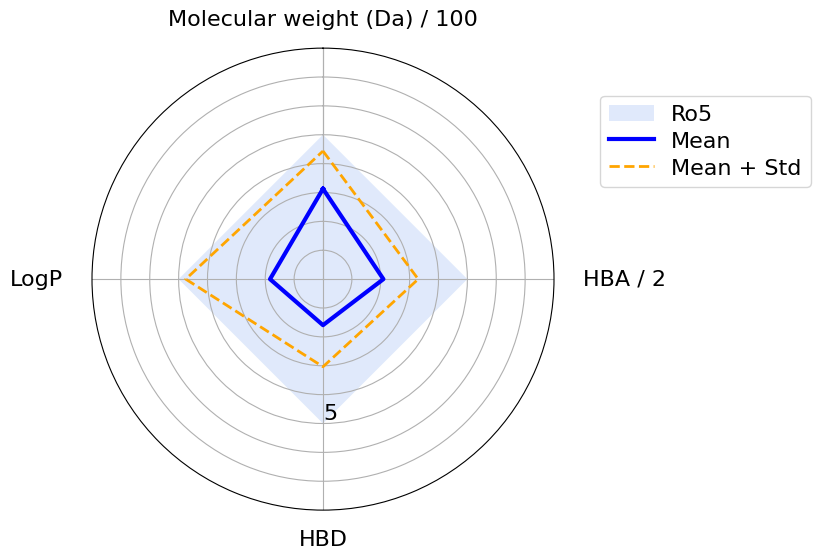

In [79]:
plot_radar(
    molecules_ro5_fulfilled_stats,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max,
)

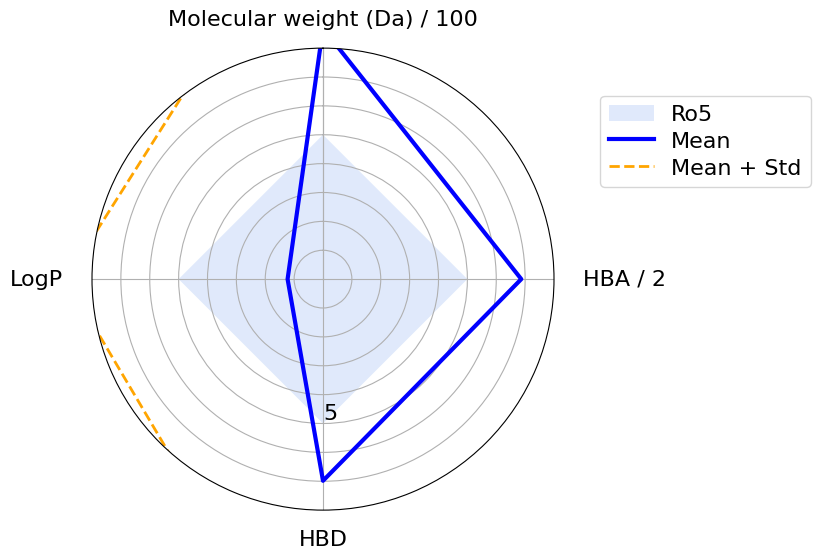

In [80]:
plot_radar(
    molecules_ro5_violated_stats,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max,
)